In [1]:
import scanpy as sc
import numpy as np

In [2]:
adata = sc.read('../../../pipeline/data/pp/hlca_healthy_ipf_embed_balanced.h5ad')
adata

AnnData object with n_obs × n_vars = 450214 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_leve

# fix celltypes

In [3]:
np.unique(adata.obs['transf_ann_level_3_label'].astype(str))

array(['AT1', 'AT2', 'B cell lineage', 'Basal', 'Dendritic cells',
       'EC arterial', 'EC capillary', 'EC venous', 'Fibroblasts',
       'Innate lymphoid cell NK', 'Lymphatic EC differentiating',
       'Lymphatic EC mature', 'Lymphatic EC proliferating', 'Macrophages',
       'Mast cells', 'Monocytes', 'Multiciliated lineage',
       'Myofibroblasts', 'SM activated stress response', 'Secretory',
       'Smooth muscle FAM83D+', 'Submucosal Secretory', 'T cell lineage',
       'nan'], dtype=object)

In [4]:
core = adata[adata.obs['core_or_extension'] == 'core'].copy()
core

AnnData object with n_obs × n_vars = 106279 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_leve

In [5]:
core.obs[['ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5']]

,ann_level_1,ann_level_2,ann_level_3,ann_level_4,ann_level_5
D344_Brus_Dis1_CATTCGCGTGCCTGCA-1-14,Epithelial,Airway epithelium,Secretory,Club,Club (non-nasal)
P2_5_GTAACTGAGCCTCGTG,Immune,Myeloid,Macrophages,Alveolar macrophages,Alveolar Mph CCL3+
D339_Biop_Int1_AGAGCGAGTAGGCATG-1-9,Epithelial,Airway epithelium,Secretory,Club,Club (non-nasal)
TAATTCCAGCGTCTGC_T90,Epithelial,Airway epithelium,Secretory,Club,Club (non-nasal)
P2_5_TAGACCATCAATCTCT,Immune,Myeloid,Macrophages,Alveolar macrophages,Alveolar Mph CCL3+
...,...,...,...,...,...
P3_7_GAGCAGATCGGCTTGG,Endothelial,Blood vessels,EC arterial,None,None
GATGAAAGTGCTCTTC-1-HCATisStab7659971,Stroma,Fibroblast lineage,Fibroblasts,Alveolar fibroblasts,None
P3_5_TTGTAGGGTTAGTGGG,Stroma,Fibroblast lineage,Fibroblasts,Alveolar fibroblasts,None
AGTGGGAGTTGTCTTT-1-7,Epithelial,Airway epithelium,Secretory,Goblet,Goblet (nasal)


In [6]:
np.unique(core.obs['ann_level_3'])

array(['AT1', 'AT2', 'B cell lineage', 'Basal', 'Dendritic cells',
       'EC arterial', 'EC capillary', 'EC venous', 'Fibroblasts',
       'Innate lymphoid cell NK', 'Lymphatic EC differentiating',
       'Lymphatic EC mature', 'Lymphatic EC proliferating', 'Macrophages',
       'Mast cells', 'Monocytes', 'Multiciliated lineage',
       'Myofibroblasts', 'None', 'Rare', 'SM activated stress response',
       'Secretory', 'Smooth muscle FAM83D+', 'Submucosal Secretory',
       'T cell lineage'], dtype=object)

In [7]:
ext = adata[adata.obs['core_or_extension'] != 'core'].copy()
ext

AnnData object with n_obs × n_vars = 343935 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_leve

In [8]:
np.unique(ext.obs['transf_ann_level_3_label'])

array(['AT1', 'AT2', 'B cell lineage', 'Basal', 'Dendritic cells',
       'EC arterial', 'EC capillary', 'EC venous', 'Fibroblasts',
       'Innate lymphoid cell NK', 'Lymphatic EC differentiating',
       'Lymphatic EC mature', 'Lymphatic EC proliferating', 'Macrophages',
       'Mast cells', 'Monocytes', 'Multiciliated lineage',
       'Myofibroblasts', 'SM activated stress response', 'Secretory',
       'Smooth muscle FAM83D+', 'Submucosal Secretory', 'T cell lineage'],
      dtype=object)

In [9]:
for i in range(5):
    i = str(i+1)
    adata.obs[f'ann_level_{i}_label_final'] = np.nan
    adata.obs.loc[core.obs_names, f'ann_level_{i}_label_final'] = core.obs[f'ann_level_{i}']
    adata.obs.loc[ext.obs_names, f'ann_level_{i}_label_final'] = ext.obs[f'transf_ann_level_{i}_label']
    adata.obs[f'ann_level_{i}_label_final'] = adata.obs[f'ann_level_{i}_label_final'].astype('category')
    print(f'Categories for i = {i}:')
    print(np.unique(adata.obs[f'ann_level_{i}_label_final']))

Categories for i = 1:
['Endothelial' 'Epithelial' 'Immune' 'Stroma']
Categories for i = 2:
['Airway epithelium' 'Alveolar epithelium' 'Blood vessels'
 'Fibroblast lineage' 'Hematopoietic stem cells' 'Lymphatic EC' 'Lymphoid'
 'Mesothelium' 'Myeloid' 'Smooth muscle' 'Submucosal Gland']
Categories for i = 3:
['AT1' 'AT2' 'B cell lineage' 'Basal' 'Dendritic cells' 'EC arterial'
 'EC capillary' 'EC venous' 'Fibroblasts' 'Innate lymphoid cell NK'
 'Lymphatic EC differentiating' 'Lymphatic EC mature'
 'Lymphatic EC proliferating' 'Macrophages' 'Mast cells' 'Monocytes'
 'Multiciliated lineage' 'Myofibroblasts' 'None' 'Rare'
 'SM activated stress response' 'Secretory' 'Smooth muscle FAM83D+'
 'Submucosal Secretory' 'T cell lineage']
Categories for i = 4:
['2_Mesothelium' '2_Smooth muscle' '3_AT1' '3_AT2' '3_EC arterial'
 '3_Lymphatic EC differentiating' '3_Lymphatic EC mature'
 '3_Lymphatic EC proliferating' '3_Mast cells' '3_Myofibroblasts'
 '3_SM activated stress response' '3_Smooth muscle F

# add OG umap

In [10]:
adata_og = sc.read('../../../pipeline/data/raw/HLCA_full_v1.1_to_share.h5ad', backed='r')
adata_og

AnnData object with n_obs × n_vars = 2282447 × 59586 backed at '../../../pipeline/data/raw/HLCA_full_v1.1_to_share.h5ad'
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampli

In [11]:
adata.obsm['X_umap_og'] = adata_og[adata.obs_names].obsm['X_umap']
adata

AnnData object with n_obs × n_vars = 450214 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_leve

In [12]:
adata.obsm['X_umap'] = adata.obsm['X_umap_og'].copy()

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' w

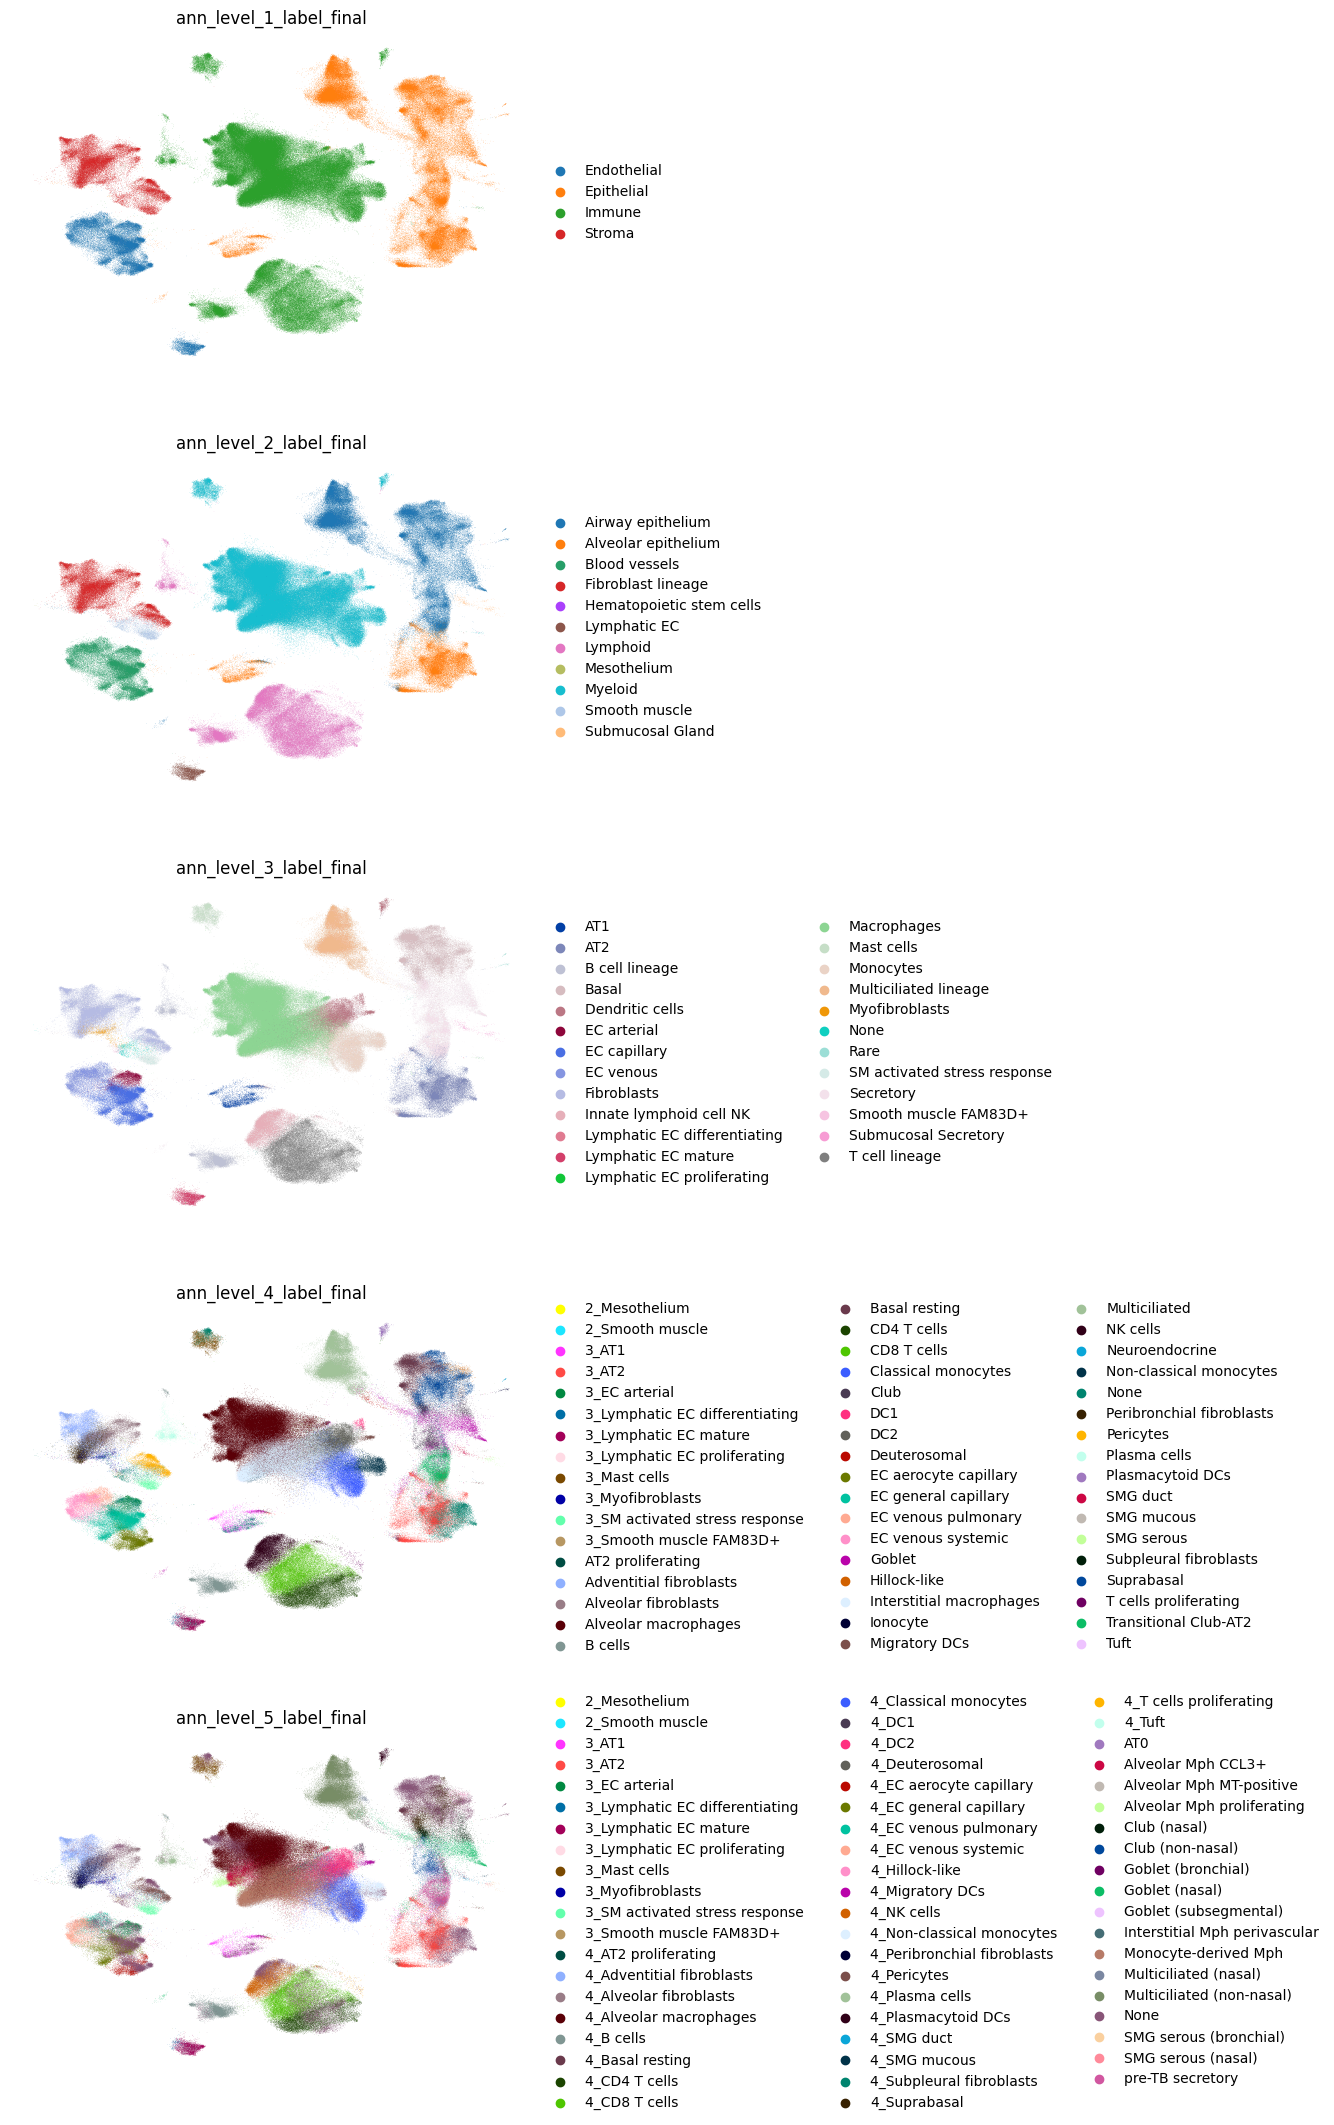

In [14]:
sc.pl.umap(
    adata,
    color=[
        'ann_level_1_label_final',
        'ann_level_2_label_final',
        'ann_level_3_label_final',
        'ann_level_4_label_final',
        'ann_level_5_label_final'
    ],
    ncols=1,
    frameon=False,
)

# save

In [15]:
adata.write('../../../pipeline/data/pp/hlca_healthy_ipf_embed_balanced_final.h5ad')